# Importing Libraries

In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import astropy
from astropy.io import fits

%matplotlib inline

# Importing Data

In [90]:
# Importing unmasked data - NOTE: this .dat file is tab seperated
data = pd.read_csv("best_fit_solutions.v2.1.refit.dat", delimiter = "\t")
# Renaming column names
data.columns = ['ncomps', 
                'x',
                'y',
                'brightness_temp',
                'err_brightness_temp',
                'cent_vel',
                'err_cent_vel',
                'vel_disp',
                'err_vel_disp',
                'rms',
                'residual',
                'chisq',
                'dof',
                'redchisq',
                'aic']

# Importing masked data - NOTE: this .dat file is space separated
data_masked = pd.read_csv("best_fit_solutions.v2.1.refit_mask.dat", delimiter =" ")
# Renaming column names
data_masked.columns = ['ncomps', 
                'x',
                'y',
                'brightness_temp',
                'err_brightness_temp',
                'cent_vel',
                'err_cent_vel',
                'vel_disp',
                'err_vel_disp',
                'rms',
                'residual',
                'chisq',
                'dof',
                'redchisq',
                'aic']

# Importing mom2 data
hdul = astropy.io.fits.open('HC3N_TP_7m_12m_feather.mom2.fits', memmap=True)
mom2 = hdul[0].data

# Cleaning Data

In [91]:
# Removing ncomps=0 from unmasked data. Data set goes from 904893 to 897097 data points.
# print(len(data.index))
data = data.drop(data[data.ncomps == 0].index)
# print(len(data.index))

# Removing ncomps = 0 from masked data. Data set goes from 861060 to 856491 data points.
# print(len(data_masked.index))
data_masked = data_masked.drop(data_masked[data_masked.ncomps == 0].index)
# print(len(data_masked.index))

# Removing NaN values. Data goes from 929071 to 452368 data points. NOTE: data and data_masked do not contain any NaN values
no_nan_mom2 = mom2[~np.isnan(mom2)]
# print(len(mom2.flatten()))
# print(len(no_nan_mom2))

# Unmasked Brightness Temperature vs Velocity Dispersion Scatter

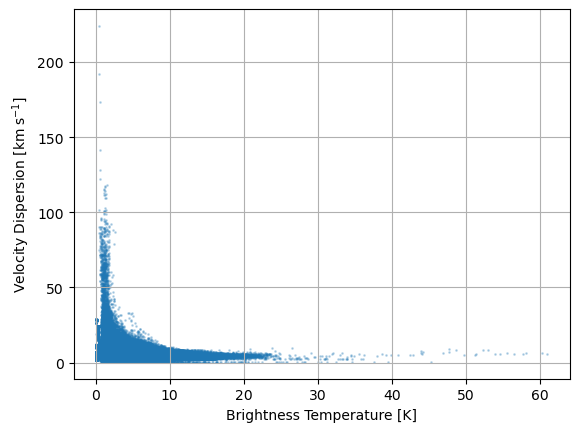

In [43]:
#plt.title("Scatter Plot of Brightness Temperature [K] vs Velocity Dispersion [$\mathregular{m_ s^{-1}}$] in SgrB2")
plt.scatter(data.brightness_temp, data.vel_disp, color='tab:blue', alpha=0.25, s=1)
plt.ylabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.xlabel("Brightness Temperature [K]")
plt.grid()

# Saving the graph
#plt.savefig("figures/brightness_temp_X_vel_disp_unmasked.png", dpi = 128, bbox_inches='tight')

plt.show()

# Unmasked Brightness Temperature vs Velocity Dispersion Scatter Log

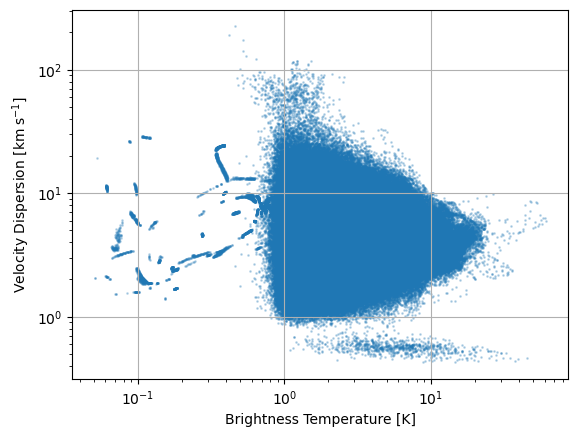

In [44]:
#plt.title("Scatter Plot of Brightness Temperature [K] vs Velocity Dispersion [$\mathregular{m_ s^{-1}}$] in SgrB2")
plt.scatter(data.brightness_temp, data.vel_disp, color='tab:blue', alpha=0.25, s=1)
plt.ylabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.xlabel("Brightness Temperature [K]")
plt.grid()
plt.yscale('log')
plt.xscale('log')

# Saving the graph
#plt.savefig("figures/brightness_temp_X_vel_disp_unmasked_log.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Brightness Temperature vs Velocity Dispersion Scatter

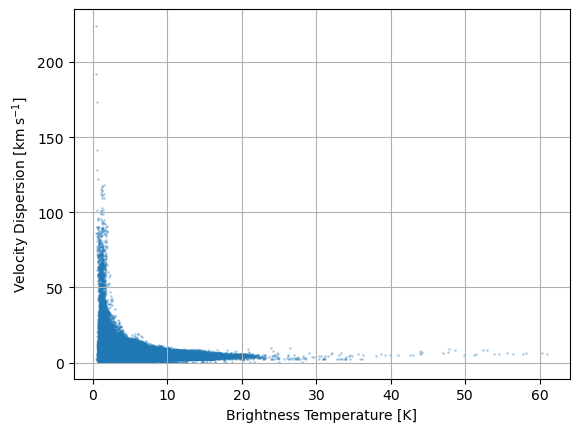

In [45]:
#plt.title("Scatter Plot of Brightness Temperature [K] vs Velocity Dispersion [$\mathregular{m_ s^{-1}}$] in SgrB2")
plt.scatter(data_masked.brightness_temp, data_masked.vel_disp, color='tab:blue', alpha=0.25, s=1)
plt.ylabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.xlabel("Brightness Temperature [K]")
plt.grid()

# Saving the graph
#plt.savefig("figures/brightness_temp_X_vel_disp_masked.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Brightness Temperature vs Velocity Dispersion Scatter Log

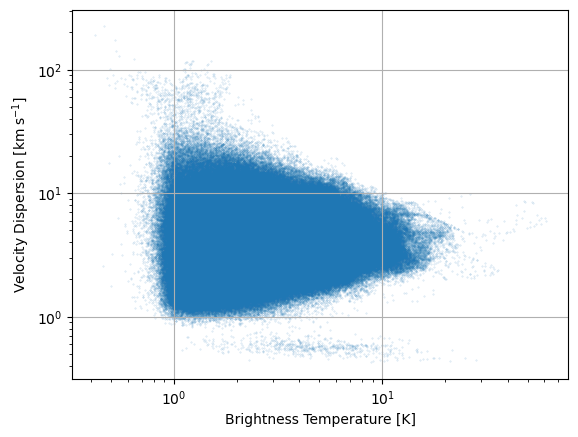

In [46]:
#plt.title("Scatter Plot of Brightness Temperature [K] vs Velocity Dispersion [$\mathregular{m_ s^{-1}}$] in SgrB2")
plt.scatter(data_masked.brightness_temp, data_masked.vel_disp, color='tab:blue', alpha=0.25, s=0.1)
plt.ylabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.xlabel("Brightness Temperature [K]")
plt.grid()
plt.yscale('log')
plt.xscale('log')

# Saving the graph
#plt.savefig("figures/brightness_temp_X_vel_disp_masked_log.png", dpi = 128, bbox_inches='tight')

plt.show()

# Unmasked vs Masked Velocity Dispersion Histogram

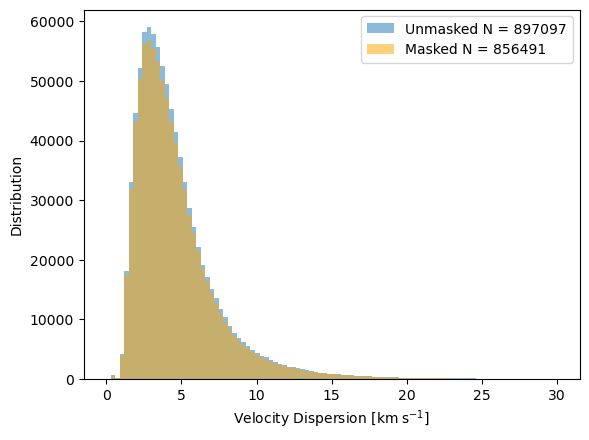

In [52]:
# Unmasked histogram parameters
bin_number = 100
x_min = 0
x_max = 30

# Masked histogram parameters
bin_number_masked = 100
x_min_masked = 0
x_max_masked = 30

# Unmasked Histogram

plt.hist(data.vel_disp, bins=bin_number, range=(x_min, x_max), color='tab:blue', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.grid()

plt.hist(data_masked.vel_disp, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='orange', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Legend
unmasked_size = (len(data['vel_disp']))
masked_size = (len(data_masked['vel_disp']))
plt.legend([f'Unmasked N = {unmasked_size}', f'Masked N = {masked_size}'])

# Saving the graph
#plt.savefig("figures/velocity_dispersion_unmasked_X_masked_histogram.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Velocity Dispersion Histogram

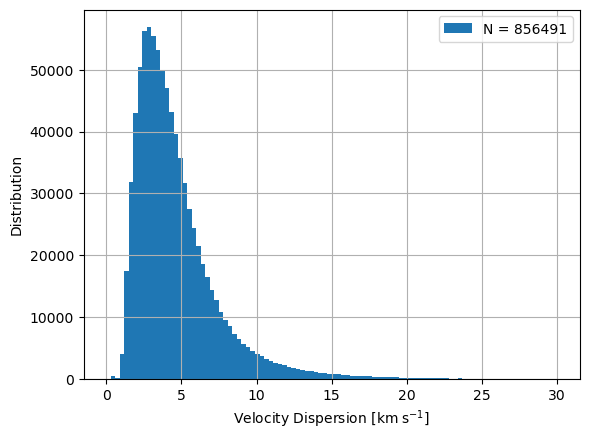

In [53]:
bin_number_masked = 100
x_min_masked = 0
x_max_masked = 30

plt.hist(data_masked.vel_disp, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='tab:blue')
plt.ylabel("Distribution")
plt.xlabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Legend
masked_size = (len(data_masked['vel_disp']))
plt.legend([f'N = {masked_size}'])

# Saving the graph
#plt.savefig("figures/velocity_dispersion_masked_histogram.png", dpi = 128, bbox_inches='tight')

plt.show()

# Unmasked vs Masked Velocity Dispersion Histogram Log

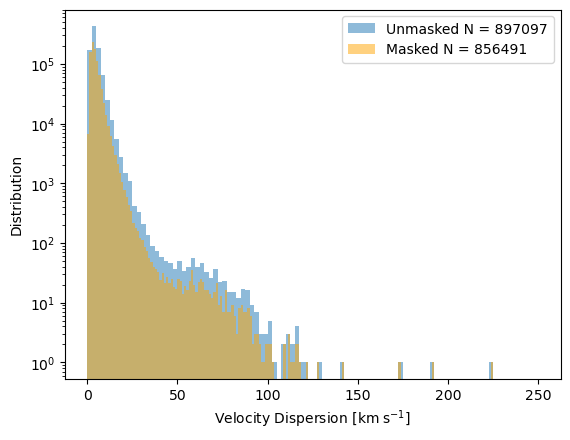

In [62]:
# Unmasked histogram parameters
bin_number = 100
x_min = 0
x_max = 250

# Masked histogram parameters
bin_number_masked = 200
x_min_masked = 0
x_max_masked = 250

# Unmasked Histogram
plt.hist(data.vel_disp, bins=bin_number, range=(x_min, x_max), color='tab:blue', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.grid()

# Masked Histogram
plt.hist(data_masked.vel_disp, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='orange', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.yscale('log')

# Legend
unmasked_size = (len(data['vel_disp']))
masked_size = (len(data_masked['vel_disp']))
plt.legend([f'Unmasked N = {unmasked_size}', f'Masked N = {masked_size}'])


# Saving the graph
#plt.savefig("figures/velocity_dispersion_unmasked_X_masked_histogram_log.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Velocity Dispersion Histogram Log

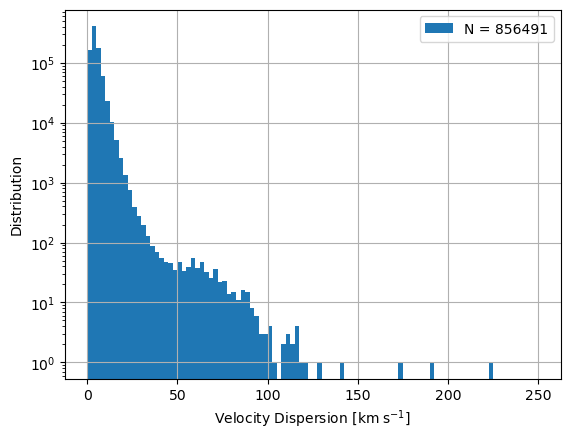

In [94]:
bin_number_masked = 100
x_min_masked = 0
x_max_masked = 250

plt.hist(data_masked.vel_disp, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='tab:blue')
plt.ylabel("Distribution")
plt.xlabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")
plt.grid()
plt.yscale('log')

# Legend
unmasked_size = (len(data['vel_disp']))
masked_size = (len(data_masked['vel_disp']))
plt.legend([f'N = {masked_size}'])


# Saving the graph
plt.savefig("figures/velocity_dispersion_masked_histogram_log.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Velocity Dispersion vs mom2 Histogram

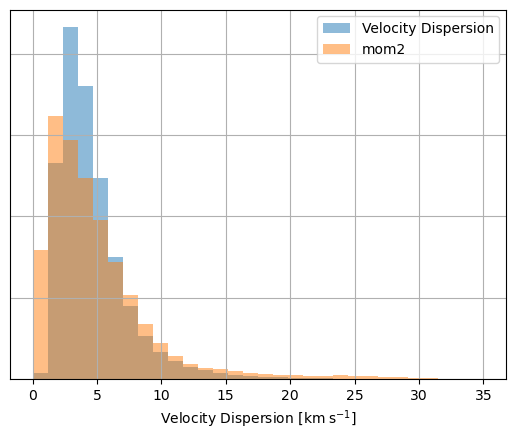

In [64]:
#plt.title("Distribution of Velocity Dispersion [$\mathregular{m_ s^{-1}}$] in SgrB2")
# This plot is normalised, delete the density = True attributes to remove this
plt.hist(data_masked.vel_disp, bins=30, range=(0,35), color='tab:blue', alpha=0.5, density=True, label = "Velocity Dispersion")
plt.hist(no_nan_mom2, bins=30, range=(0,35), color='tab:orange', alpha=0.5, density=True, label = "mom2")
plt.tick_params(left = False, labelleft = False ,
                labelbottom = True, bottom = True)
plt.xlabel("Velocity Dispersion [$\mathregular{km_ s^{-1}}$]")

# Legend
plt.legend(['Velocity Dispersion', 'mom2'])

plt.grid()

# Saving the graph
plt.savefig("figures/velocity_dispersion_masked_X_mom2_histogram.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked vs Unmasked Peak Brightness Temperature Histogram

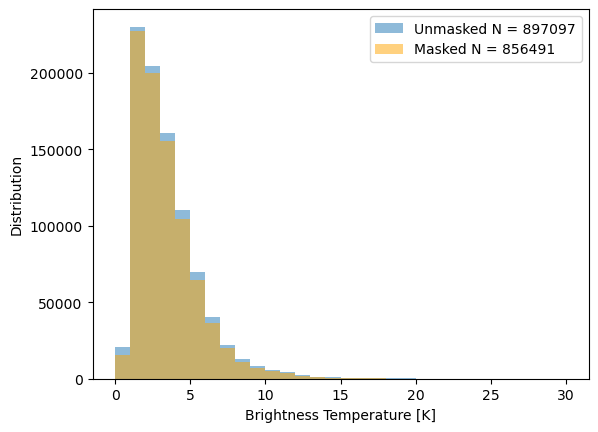

In [74]:
# Unmasked histogram parameters
bin_number = 30
x_min = 0
x_max = 30

# Masked histogram parameters
bin_number_masked = 30
x_min_masked = 0
x_max_masked = 30

# Unmasked Histogram
plt.hist(data.brightness_temp, bins=bin_number, range=(x_min, x_max), color='tab:blue', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Brightness Temperature [K]")
plt.grid()

# Masked Histogram
plt.hist(data_masked.brightness_temp, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='orange', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Brightness Temperature [K]")
plt.grid()

# Legend
unmasked_size = (len(data['brightness_temp']))
masked_size = (len(data_masked['brightness_temp']))
plt.legend([f'Unmasked N = {unmasked_size}', f'Masked N = {masked_size}'])


# Saving the graph
#plt.savefig("figures/brightness_temperature_unmasked_X_masked_histogram.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked vs Unmasked Peak Brightness Temperature Histogram Log

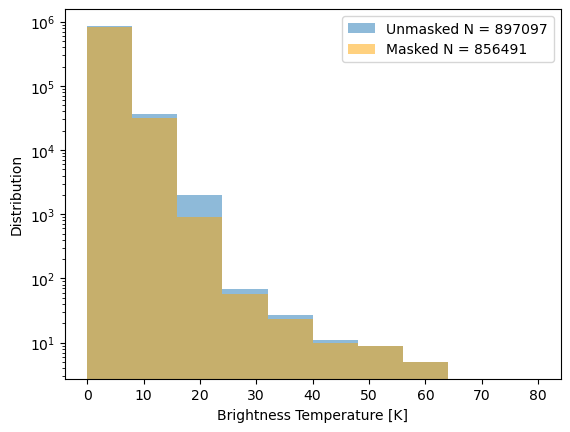

In [88]:
# Unmasked histogram parameters
bin_number = 10
x_min = 0
x_max = 80

# Masked histogram parameters
bin_number_masked = 10
x_min_masked = 0
x_max_masked = 80

# Unmasked Histogram
plt.hist(data.brightness_temp, bins=bin_number, range=(x_min, x_max), color='tab:blue', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Brightness Temperature [K]")
plt.grid()

# Masked Histogram
plt.hist(data_masked.brightness_temp, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='orange', alpha= 0.5)
plt.ylabel("Distribution")
plt.xlabel("Brightness Temperature [K]")
plt.grid()
plt.yscale('log')

# Legend
unmasked_size = (len(data['brightness_temp']))
masked_size = (len(data_masked['brightness_temp']))
plt.legend([f'Unmasked N = {unmasked_size}', f'Masked N = {masked_size}'])


# Saving the graph
#plt.savefig("figures/brightness_temperature_unmasked_X_masked_histogram_log.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Peak Brightness Temperature Histogram

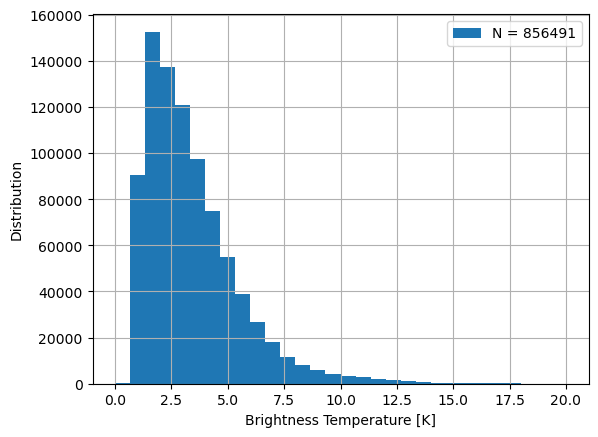

In [93]:
bin_number_masked = 30
x_min_masked = 0
x_max_masked = 20

plt.hist(data_masked.brightness_temp, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='tab:blue')
plt.ylabel("Distribution")
plt.xlabel("Brightness Temperature [K]")
plt.grid()

# Legend
masked_size = (len(data_masked['brightness_temp']))
plt.legend([f'N = {masked_size}'])


# Saving the graph
plt.savefig("figures/brightness_temperature_masked_histogram.png", dpi = 128, bbox_inches='tight')

plt.show()

# Masked Peak Brightness Temperature Histogram Log

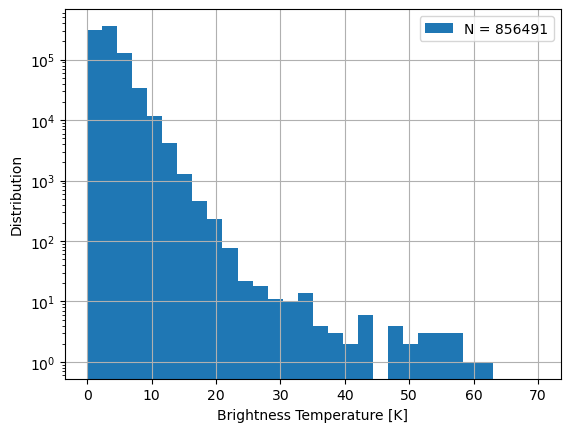

In [92]:
bin_number_masked = 30
x_min_masked = 0
x_max_masked = 70

plt.hist(data_masked.brightness_temp, bins=bin_number_masked, range=(x_min_masked, x_max_masked), color='tab:blue')
plt.ylabel("Distribution")
plt.xlabel("Brightness Temperature [K]")
plt.grid()
plt.yscale('log')

# Legend
masked_size = (len(data_masked['brightness_temp']))
plt.legend([f'N = {masked_size}'])


# Saving the graph
#plt.savefig("figures/brightness_temperature_masked_histogram_log.png", dpi = 128, bbox_inches='tight')

plt.show()